### Complexes

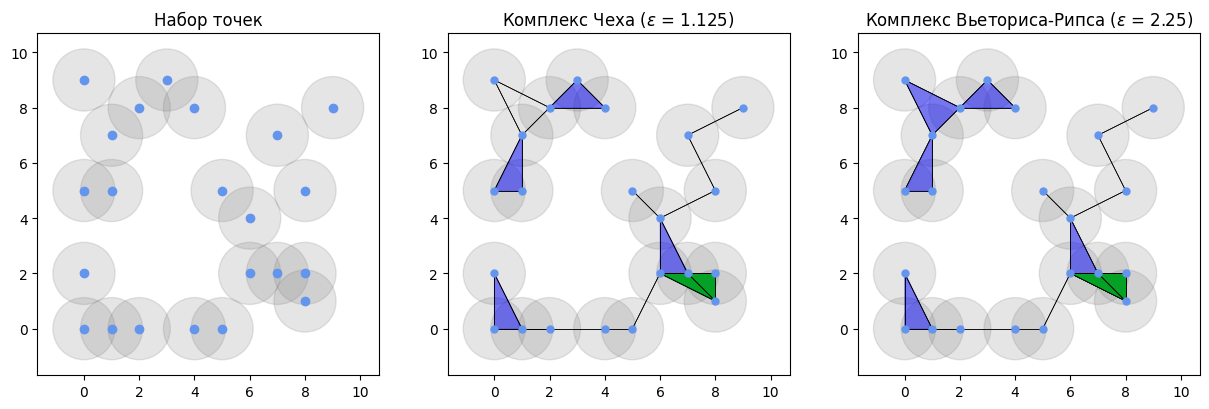

In [2]:
import numpy
import itertools
import matplotlib.pyplot as plt
import matplotlib.patches as ptchs

eps = 1.125
numpy.random.seed(6876)
homology_dimensions = [ 3, 4, 5, 2, 1 ]

points = numpy.random.randint(0, 10, (25, 2))
points = numpy.unique(points, axis = 0)
fig, axes = plt.subplots(1, 3, figsize = (15, 5))

def setup_axis(ax, points):
    ax.set_aspect('equal')
    for (x, y) in points:
        ax.add_patch(ptchs.Circle((x, y), eps, color = 'gray', alpha = 0.2))
    ax.scatter(points[:, 0], points[:, 1], alpha = 0)

def draw_simplex(ax, points):
    colors = [ None, 'cornflowerblue', 'black', (0, 0, 1, 0.1), (0, 0.75, 0, 0.1) ]
    color = colors[len(points)]
    if len(points) == 1:
        ax.scatter(points[0][0], points[0][1], 25, color = color)
    else:
        for pts in itertools.permutations(points):
            ax.add_patch(ptchs.Polygon(pts, color = color, linewidth = 0.5))


setup_axis(axes[0], points)
axes[0].set_title('Набор точек')
axes[0].scatter(points[:, 0], points[:, 1], color = 'cornflowerblue')


setup_axis(axes[1], points)
axes[1].set_title(f'Комплекс Чеха ($\epsilon$ = {eps})')
for dim in homology_dimensions:
    for pts in itertools.combinations(points, dim):
        pts = numpy.array(pts)
        xmin, xmax = numpy.min(pts[:, 0]), numpy.max(pts[:, 0])
        ymin, ymax = numpy.min(pts[:, 1]), numpy.max(pts[:, 1])
        if (xmax - xmin > 2 * eps) or (ymax - ymin > 2 * eps): continue
        x_range = numpy.arange(xmin - eps, xmax + eps, 0.01)
        y_range = numpy.arange(ymin - eps, ymax + eps, 0.01)
        for (c_x, c_y) in itertools.product(x_range, y_range):
            x_dist = (pts[:, 0] - c_x) ** 2
            y_dist = (pts[:, 1] - c_y) ** 2
            is_ok = (x_dist + y_dist) <= (eps ** 2)
            if (is_ok.all()):
                draw_simplex(axes[1], pts)
                break


setup_axis(axes[2], points)
axes[2].set_title(f'Комплекс Вьеториса-Рипса ($\epsilon$ = {2 * eps})')
for dim in homology_dimensions:
    for pts in itertools.combinations(points, dim):
        is_simplex = True
        for (x1, y1), (x2, y2) in itertools.product(pts, pts):
            dist = (x2 - x1) ** 2 + (y2 - y1) ** 2
            if dist > (2 * eps) ** 2:
                is_simplex = False
                break
        if is_simplex: draw_simplex(axes[2], pts)

fig.savefig(f"complexes/complexes.svg")
fig.savefig(f"complexes/complexes.png")

### Point clouds

In [3]:
import numpy
import gtda.plotting
import gtda.time_series

x = numpy.linspace(0, 50, 1000)
y = (numpy.cos(x) + numpy.sin(numpy.pi / 2 * x))

embedding = gtda.time_series.SingleTakensEmbedding(parameters_type="fixed", dimension = 3, time_delay = 16, stride = 3)
pc = embedding.fit_transform(y)
pc = pc @ numpy.array([
    [ numpy.cos(-numpy.pi / 2), -numpy.sin(-numpy.pi / 2), 0 ],
    [ numpy.sin(-numpy.pi / 2), numpy.cos(-numpy.pi / 2), 0 ],
    [ 0, 0, 1 ]
])

fig = gtda.plotting.plot_point_cloud(pc)
fig.update_layout(
    autosize = False,
    scene = {
        'xaxis': { 'nticks': 0, 'range': [ -3, 3 ] },
        'yaxis': { 'nticks': 0, 'range': [ -3, 3 ] },
        'zaxis': { 'nticks': 0, 'range': [ -3, 3 ] }
    }
)
display(fig)
fig.write_image(file = f"point_clouds/1.svg", format = "svg")

In [4]:
x = numpy.linspace(0, 50, 1000)
y = numpy.cosh(numpy.cos(numpy.pi / 2 * x) + numpy.sin(x))

pc = embedding.fit_transform(y)
alpha = numpy.pi
pc = pc @ numpy.array([
    [ numpy.cos(alpha), -numpy.sin(alpha), 0 ],
    [ numpy.sin(alpha), numpy.cos(alpha), 0 ],
    [ 0, 0, 1 ]
])

fig = gtda.plotting.plot_point_cloud(pc)

fig.update_layout(
    autosize = False,
    scene = {
        'xaxis': { 'nticks': 0, 'range': [ -4, -0.5 ] },
        'yaxis': { 'nticks': 0, 'range': [ -4, -0.5 ] },
        'zaxis': { 'nticks': 0, 'range': [ 0, 4.5 ] }
    },
    scene_camera = {
        'up': { 'x': 0, 'y': 0, 'z': 1 },
        'center': { 'x': 0, 'y': 0, 'z': 0 },
        'eye': { 'x': 1.5, 'y': 1.5, 'z': 0.5 }
    }
)

display(fig)
fig.write_image(file = f"point_clouds/2.svg", format = "svg")

### Features

#### Diagrams

In [22]:
import numpy
import gtda.diagrams
import gtda.plotting

diagrams = numpy.load("../Subj1/exp_final/overall_diagrams.npy")

diagram = gtda.plotting.plot_diagram(diagrams[23])
display(diagram)
diagram.write_image(file = f"features/diagram.svg", format = "svg")

In [29]:
life = (diagrams[:, :, 1] - diagrams[:, :, 0]).flatten()
life = life[life != 0]
eps = numpy.percentile(life, 60)
print(eps)

filtering = gtda.diagrams.Filtering(epsilon = eps)
filtered_diagrams = filtering.fit_transform(diagrams)

filtered_diagram = gtda.plotting.plot_diagram(filtered_diagrams[23])
display(filtered_diagram)
filtered_diagram.write_image(file = f"features/filtered_diagram.svg", format = "svg")

3.322810516692698e-06


#### Life & bd2

(186,)


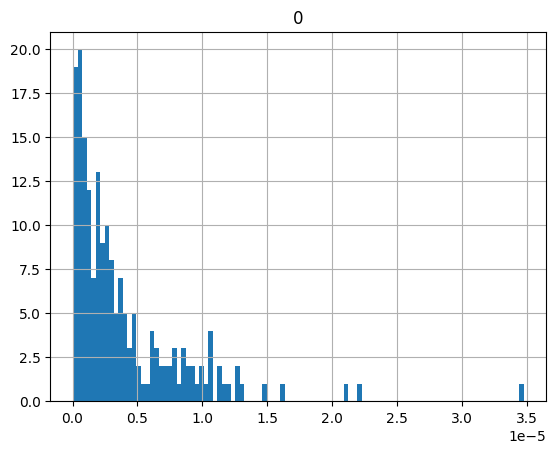

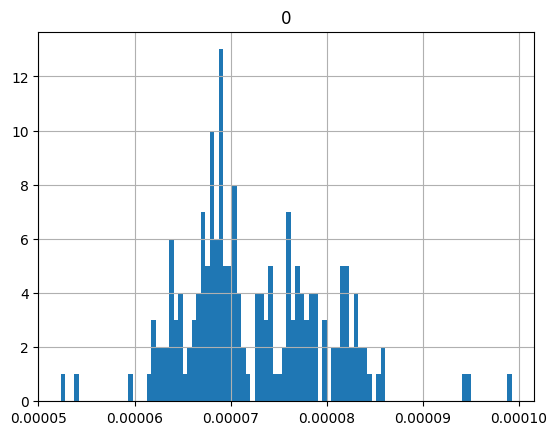

In [30]:
print_obj = 23
birth, death, dim = diagrams[print_obj, :, 0], diagrams[print_obj, :, 1], diagrams[print_obj, :, 2]
life = death - birth

birth, death, dim = birth[life > 0], death[life > 0], dim[life > 0]
bd2 = (birth + death) / 2.0
life = death - birth
print(life.shape)

import pandas
import matplotlib.pyplot as plt

life_hist = pandas.DataFrame(life.reshape(-1, 1)).hist(bins = 100)
plt.savefig("features/life.svg")

bd2_hist = pandas.DataFrame(bd2.reshape(-1, 1)).hist(bins = 100)
plt.savefig("features/bd2.svg")

#### Betti

In [81]:
import gtda.curves
import gtda.diagrams
import gtda.plotting

betti = gtda.diagrams.BettiCurve()
betti_curves = betti.fit_transform(diagrams)
betti_fig = betti.plot(betti_curves, sample = 787)
betti_fig.update_layout(width = 1000, height = 1000)
display(betti_fig)
betti_fig.write_image(file = f"features/betti.svg", format = "svg")

In [80]:
derivative = gtda.curves.Derivative()
betti_der = derivative.fit_transform(betti_curves)
betti_der_fig = betti.plot(betti_der, sample = 787)
betti_der_fig.update_layout(width = 1000, height = 1000)
display(betti_der_fig)
betti_der_fig.write_image(file = f"features/betti_der.svg", format = "svg")

#### Landscape

In [82]:
import gtda.curves
import gtda.diagrams
import gtda.plotting

landscape = gtda.diagrams.PersistenceLandscape(n_layers = 3)
landscapes = landscape.fit_transform(diagrams)
landscape_fig = landscape.plot(landscapes, sample = 787)
landscape_fig.update_layout(width = 1000, height = 1000)
display(landscape_fig)
landscape_fig.write_image(file = f"features/landscape.svg", format = "svg")

#### Silhouette

In [83]:
import gtda.curves
import gtda.diagrams
import gtda.plotting

silhouette = gtda.diagrams.Silhouette(power = 1)
silhouettes = silhouette.fit_transform(diagrams)
silhouette_fig = silhouette.plot(silhouettes, sample = 794)
silhouette_fig.update_layout(width = 1000, height = 1000)
display(silhouette_fig)
silhouette_fig.write_image(file = f"features/silhouette.svg", format = "svg")

### IV

In [17]:
import numpy
import pandas

subj = "Subj1"
IV = pandas.read_csv(f"../{subj}/exp_final/IV.csv").drop(columns = [ 'Unnamed: 0' ])
IV[["Source", "Algoirithm", "Dimension", "Stat"]] = IV['Feature'].str.split(' ', expand = True)
IV = IV.sort_values(by = "true", ascending = False)
IV.to_csv(f"../{subj}/exp_final/IV-processed.csv")
IV

,Feature,true,internal,external,internal-diff,external-diff,Source,Algoirithm,Dimension,Stat
2718,channel-12 bd2 dim-1 norm-2,2.469136,2.533030,2.610525,-0.063894,-0.141388,channel-12,bd2,dim-1,norm-2
2707,channel-12 bd2 all norm-2,2.376699,2.521609,2.599353,-0.144909,-0.222654,channel-12,bd2,all,norm-2
1449,channel-6 bd2 dim-1 mean,2.308480,2.345347,2.509709,-0.036867,-0.201228,channel-6,bd2,dim-1,mean
1458,channel-6 bd2 dim-1 norm-2,2.303774,2.348671,2.477242,-0.044897,-0.173469,channel-6,bd2,dim-1,norm-2
1441,channel-6 bd2 all percentile-25,2.302143,2.344405,2.471645,-0.042262,-0.169502,channel-6,bd2,all,percentile-25
...,...,...,...,...,...,...,...,...,...,...
15889,dissim-16 amplitude-wasserstein-1 dim-5,0.000000,0.000000,0.000000,0.000000,0.000000,dissim-16,amplitude-wasserstein-1,dim-5,None
10126,dissim-3 life dim-4 std,0.000000,0.000000,0.000000,0.000000,0.000000,dissim-3,life,dim-4,std
15896,dissim-16 amplitude-wasserstein-2 dim-5,0.000000,0.000000,0.000000,0.000000,0.000000,dissim-16,amplitude-wasserstein-2,dim-5,None
10120,dissim-3 life dim-3 kurtosis,0.000000,0.000000,0.000000,0.000000,0.000000,dissim-3,life,dim-3,kurtosis


In [18]:
stats = numpy.zeros(40)
counts = numpy.zeros(40)
for i, row in IV.reset_index().iterrows():
    if not row['Source'].startswith('channel'):
        continue
    num = int(row['Source'][8:])
    stats[num] += i
    counts[num] += 1
res = stats / counts
res.argsort()

array([12,  6, 11,  7, 16, 32, 26, 27, 17, 31, 34,  1, 33, 30,  0,  8, 18,
       25, 21, 37,  9, 35, 13, 10, 15,  3, 39, 36, 14, 38,  5, 20,  2, 29,
       23, 19,  4, 22, 28, 24], dtype=int64)

### Sensors

Reading d:\HSE\year-3\HSE\CourseProject\report\..\Subj2\src\epochs_filt_rr-epo.fif ...
    Found the data of interest:
        t =    -500.00 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
2019 matching events found
No baseline correction applied
0 projection items activated


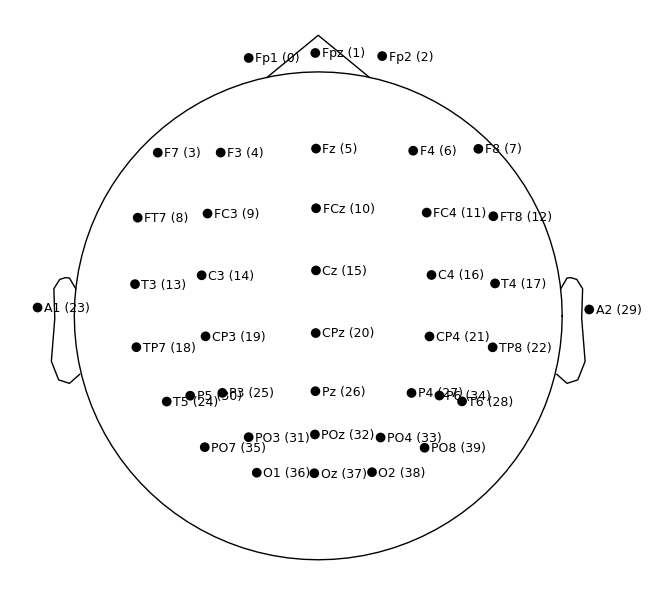

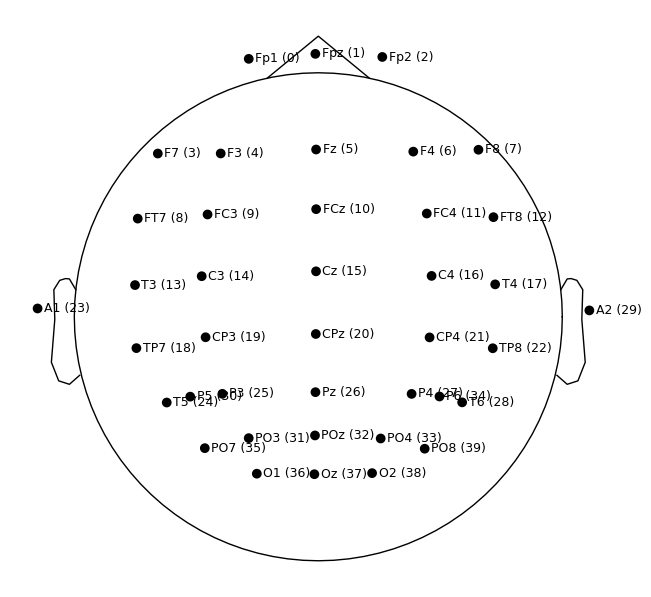

In [15]:
import mne
epochs = mne.read_epochs(f"../Subj2/src/epochs_filt_rr-epo.fif")
epochs.rename_channels({ name: f'{name} ({i})' for i, name in enumerate(epochs.ch_names) })

import matplotlib
matplotlib.rcParams.update({'font.size': 9})
fig = epochs.plot_sensors('topomap', show_names = True)
display(fig)
fig.savefig(f"regions/regions.svg")
fig.savefig(f"regions/regions.png")